PROYECTO WEB SCRAPING

# Ruta trabajo

In [1]:
import os #Definir el directorio de trabajo
os.chdir(r'E:\Estudio\Big_Data_Python\Aplicando_WEB_SCRAPING')
os.getcwd() #conocer el directorio de trabajo

'E:\\Estudio\\Big_Data_Python\\Aplicando_WEB_SCRAPING'

# Librerias

In [10]:
from selenium import webdriver
from chromedriver_py import binary_path # this will get you the path variable
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import random
import time

# Coneccion web

In [11]:
from selenium.webdriver.chrome.service import Service as ChromeService

# Configurar el driver (asumiendo que binary_path está definido en otro lugar)
svc = webdriver.ChromeService(executable_path=binary_path)
driver = webdriver.Chrome(service=svc)
url = "https://siea.midagri.gob.pe/portal/calendario/#"
driver.get(url)

# Navegacion web

In [12]:
# Seleccionar Maiz Amarillo Duro
dropdown = WebDriverWait(driver, 20).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "span.select2-selection.select2-selection--single"))
)
dropdown.click()

search_box = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, "input.select2-search__field"))
)
search_box.clear()
search_box.send_keys("Maiz Amarillo Duro")
time.sleep(1)
search_box.send_keys(Keys.RETURN)

# Hacer click en el botón "cosecha" usando el ID correcto
cosecha_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, "btnCosecha"))
)
cosecha_button.click()
time.sleep(2)

# Llamada libreria de puntos "TOOLTIP_scraper.py"

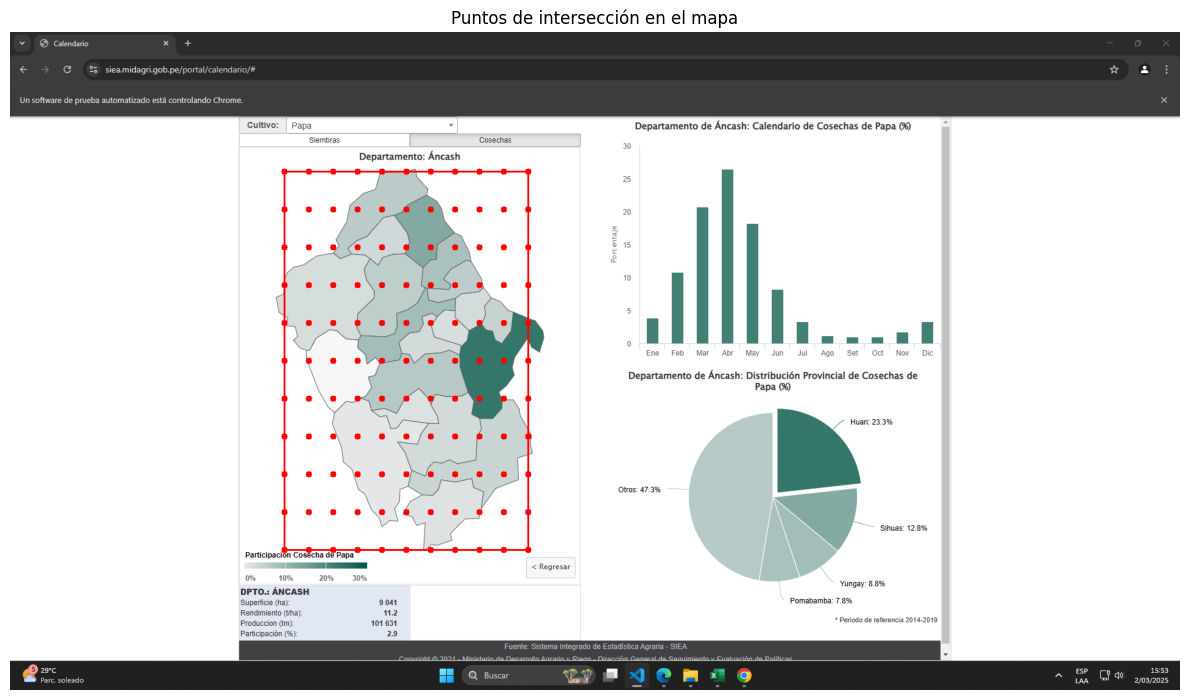

Iniciando captura de tooltips...
Encontrado en (0,2): Huaraz
Encontrado en (0,3): Santa
Encontrado en (0,5): Corongo
Encontrado en (0,6): Huaylas
Encontrado en (0,7): Sihuas
Encontrado en (0,8): Pomabamba
Encontrado en (1,1): Santa
Encontrado en (1,5): Huaylas
Encontrado en (1,7): Mariscal Luzuriaga
Encontrado en (1,9): Carlos Fermin Fitzcarrald
Encontrado en (2,3): Santa
Encontrado en (2,5): Huaylas
Encontrado en (2,6): Yungay
Encontrado en (2,7): Carhuaz
Encontrado en (2,8): Asuncion
Encontrado en (2,9): Huari
Encontrado en (2,10): Antonio Raymondi
Encontrado en (3,0): Huari
Encontrado en (3,5): Huaraz
Encontrado en (3,9): Huari
Encontrado en (4,4): Huarmey
Encontrado en (4,5): Huaraz
Encontrado en (4,6): Aija
Encontrado en (4,8): Recuay
Encontrado en (4,9): Huari
Encontrado en (4,10): Bolognesi
Encontrado en (5,4): Huarmey
Encontrado en (5,6): Recuay
Encontrado en (5,9): Bolognesi
Encontrado en (6,4): Huarmey
Encontrado en (6,7): Bolognesi
Encontrado en (6,8): Ocros
Encontrado en (6

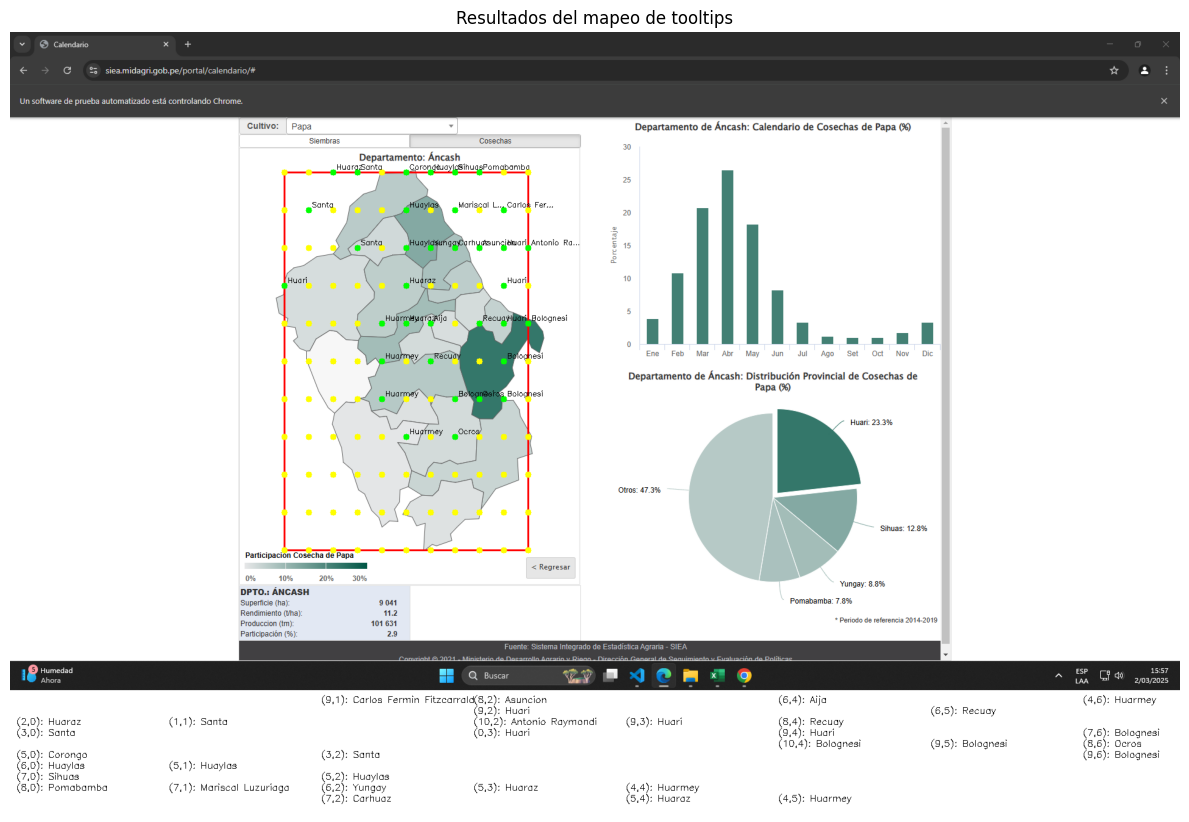


===== RESUMEN FINAL =====
Total de tooltips encontrados: 18

Lista de tooltips encontrados:
1. Aija
2. Antonio Raymondi
3. Asuncion
4. Bolognesi
5. Carhuaz
6. Carlos Fermin Fitzcarrald
7. Corongo
8. Huaraz
9. Huari
10. Huarmey
11. Huaylas
12. Mariscal Luzuriaga
13. Ocros
14. Pomabamba
15. Recuay
16. Santa
17. Sihuas
18. Yungay

Los resultados han sido guardados en 'tooltips_encontrados.csv'


In [8]:
from selenium import webdriver
from tooltip_scraper import scrape_tooltips_mapa

tooltips, mapa = scrape_tooltips_mapa(
    driver=driver,
    x_min=450,
    y_min=230,
    x_max=850,
    y_max=850,
    filas=10,
    columnas=10,
    mostrar_visualizacion=True,
    tiempo_espera=1.0
)

In [14]:
try:
    # Configuración inicial
    time.sleep(2)
    action = ActionChains(driver)
    departments = driver.find_elements(By.CSS_SELECTOR, "path.highcharts-point")
    
    # Buscar Lima en los departamentos
    for department in departments:
        try:
            action.move_to_element(department).perform()
            tooltip = driver.find_element(By.CSS_SELECTOR, ".highcharts-tooltip")
            
            if "Pallasca" in tooltip.text.strip():
                # Intentar hacer clic usando diferentes métodos
                try:
                    department.click()
                except:
                    try:
                        action.click(department).perform()
                    except:
                        driver.execute_script("arguments[0].dispatchEvent(new MouseEvent('click', {bubbles: true}));", department)
                break
        except:
            continue
            
except Exception as e:
    print(f"Error: {e}")

In [1]:
console.log('Entorno:', process.env.NODE_ENV || 'development');

SyntaxError: invalid syntax (2906609977.py, line 1)